In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [49]:
def is_message(line):
    return re.match(r'\d{1,2}/\d{1,2}/\d{2}, \d{1,2}:\d{2}', line) #padrao americano de data 

In [87]:
with open('chat.txt', 'r', encoding='utf-8') as file: # modificar o nome do arquivo
    lines = file.readlines()

dates = []
hours = []
senders = []
messages = []


In [88]:
for line in lines:
    line = line.strip()

    if is_message(line):
        # Extrair a data, o remetente e o conteúdo da primeira linha da mensagem
        date_match = re.match(r'(\d{1,2}/\d{1,2}/\d{2}), (\d{1,2}:\d{2}) - (.*?): (.*)', line)  #padrao americano de data 
        if date_match:
            dates.append(date_match.group(1))    # Data
            hours.append(date_match.group(2))    # Hora
            senders.append(date_match.group(3))  # Remetente
            messages.append(date_match.group(4)) # Primeira linha do conteúdo
            
df = pd.DataFrame({'Data': dates, 'Hora': hours, 'Remetente': senders, 'Conteúdo': messages})


In [89]:
print(df) # Teste

        Data   Hora      Remetente  \
0    6/12/24  19:44         nathan   
1    6/16/24  21:35         nathan   
2    6/16/24  21:36  gabriel balan   
3    6/16/24  21:36  gabriel balan   
4    6/16/24  21:37  gabriel balan   
..       ...    ...            ...   
191   7/1/24  15:31  paulo haliski   
192   8/9/24  19:17  gabriel balan   
193   8/9/24  19:17  gabriel balan   
194   8/9/24  19:18         nathan   
195   8/9/24  19:18  gabriel balan   

                                              Conteúdo  
0                             Pessoa - Classe Abstrata  
1    Eae Gabriel, tudo bom? Se tiver tempo, faz a c...  
2                                                 bele  
3                          cara to meio perdido no git  
4          entrei no grupo lá, mas onde eu acesso ele?  
..                                                 ...  
191  fiquei com 60 cravado kkkkkkkk <This message w...  
192                                       fala piazada  
193               conseguem me

Resumo das conversas: apresenta uma lista de remetentes e o total de conversas para cada um, ordenando pelo remetente com maior quantidade para o menor.

In [90]:
resumo_conversas = df['Remetente'].value_counts().reset_index()
resumo_conversas.columns = ['Remetente', 'Total de Mensagens']
resumo_conversas = resumo_conversas.sort_values(by='Total de Mensagens', ascending=False).reset_index(drop=True)

print(resumo_conversas)

       Remetente  Total de Mensagens
0  gabriel balan                  73
1  paulo haliski                  62
2         nathan                  61


Histórico do remetente: permite filtrar por remetente as suas mensagens, com data e hora.

Gráfico do histórico do remetente: exibir um histograma da quantidade de conversas por dia para cada remetente.

Gráfico de pizza: exibir um gráfico considerando o percentual de mensagens de cada remetente.

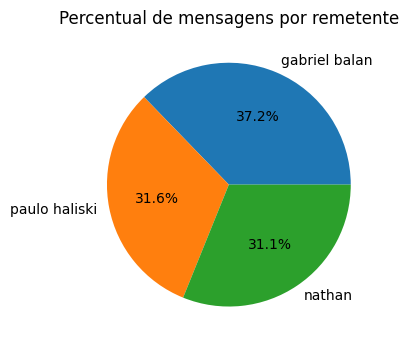

In [95]:
resumo_conversas = df['Remetente'].value_counts()

plt.figure(figsize=(4, 4))
resumo_conversas.plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentual de mensagens por remetente')
plt.ylabel('')
plt.tight_layout()
plt.show()

Gráfico de linhas: apresentar a quantidade de mensagens ao longo do tempo (data) para cada remetente. Todos os remetentes devem estar presentes no gráfico. A linha de cada remetente neste gráfico deve ser representada por uma cor diferente.


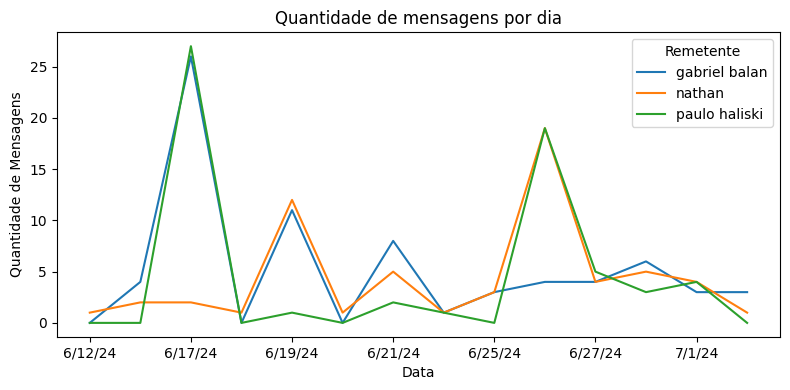

In [97]:

mensagens_por_data = df.groupby(['Data', 'Remetente']).size().unstack(fill_value=0)

mensagens_por_data.plot(figsize=(8, 4))

plt.title('Quantidade de mensagens por dia')
plt.xlabel('Data')
plt.ylabel('Quantidade de Mensagens')
plt.legend(title='Remetente')
plt.tight_layout() #ajustar elementos grafico, para não sobrepor
plt.show()